<a href="https://colab.research.google.com/github/saasha2926/ML-Projects-/blob/main/LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.shape

(598, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [12]:
if 'Loan_ID' in df.columns:
  df.drop('Loan_ID', axis = 1, inplace = True)

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

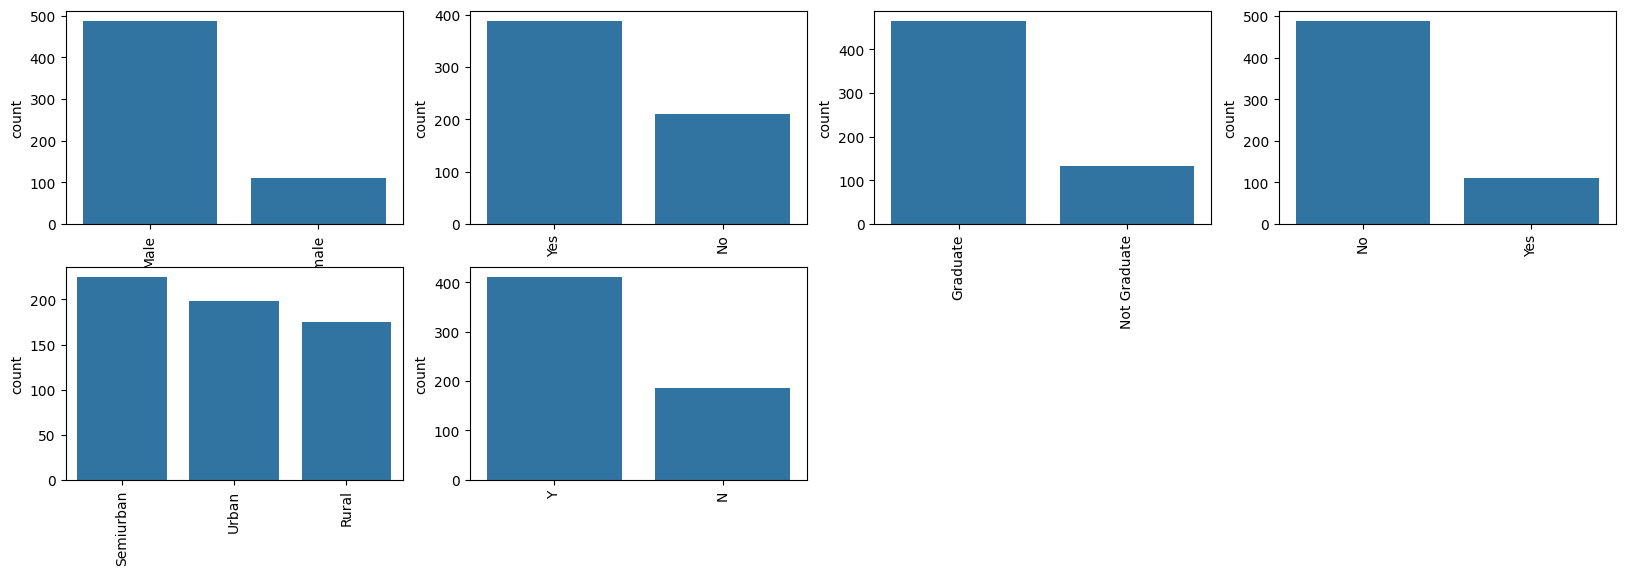

In [14]:
plt.figure(figsize=(20,36))
obj = (df.dtypes == 'object')
obj_col = list(obj[obj].index)
index = 1

for col in obj_col:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation = 90)

  sns.barplot(x=list(y.index), y = y)
  index +=1



In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_col:
  df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

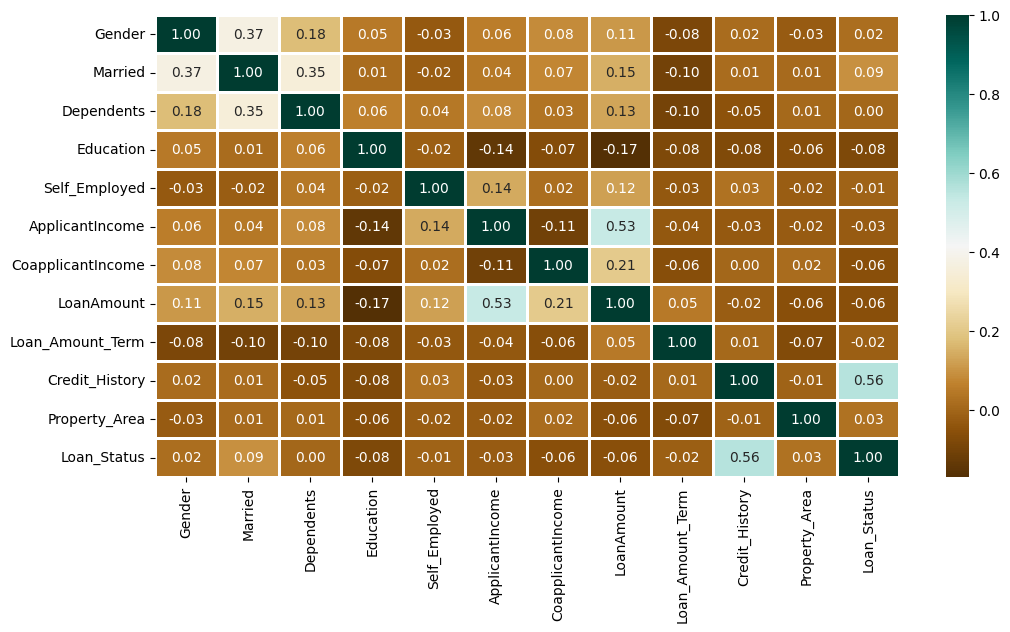

In [17]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


In [22]:
df.isna().sum()


,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [24]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())
df.isna().sum().sum()

0

In [26]:
from sklearn.model_selection import train_test_split
#if 'Loan_status' in df.columns:
x= df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 1)

from sklearn.linear_model  import LogisticRegression

lc = LogisticRegression()
lc.fit(x_train,y_train)

y_pred = lc.predict(x_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


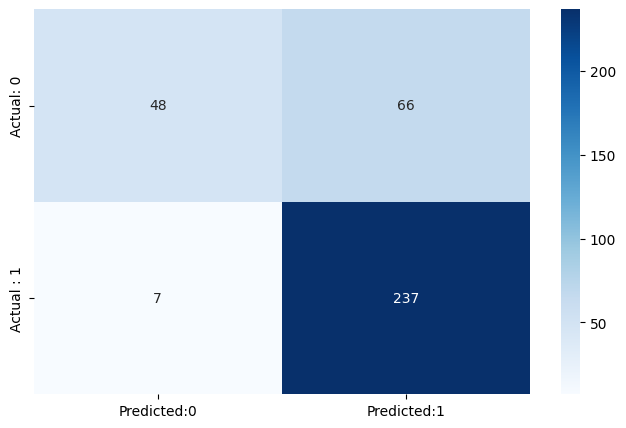

The details of the connfusion matrix :
              precision    recall  f1-score   support

           0       0.87      0.42      0.57       114
           1       0.78      0.97      0.87       244

    accuracy                           0.80       358
   macro avg       0.83      0.70      0.72       358
weighted avg       0.81      0.80      0.77       358



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index =['Actual: 0','Actual : 1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix , annot = True, fmt = 'd', cmap = 'Blues')
plt.show()
print('The details of the connfusion matrix :')
print(classification_report(y_train,y_pred))
